# E5: Creación de un juego de datos sintéticos a partir de distribuciones estadísticas

El juego de datos se compondrá de las siguientes variables:

- Sexo: Categórica
- Peso: Numérica
- Estatura: Numérica
- BMI: Numérica

Suposiciones:

- El 49,0% del total de inscritos en el Padrón son hombres y el 51,0% mujeres.
- La estatura de los hombre sigue una distribución media de 179.3 y una desviación típica 7.0.
- La estatura de las mujeres sigue una distribución media de 176.3 y una desviación típica 6.6.
- El peso de los hombre sigue una distribución media de 78.9 y una desviación típica 11.8.
- El peso de las mujeres sigue una distribución media de 60.4 y una desviación típica 9.7.
- BMI = Peso / Estatura^2

- A. Crea 100.000 individuos y sus variables.

- B. Clusteriza sus BMIs y explora si existe una relación con:
Bajo peso = menos de 18.5. Peso normal = 18.5–24.9. Sobrepeso = 25–29.9. Obesidad = BMI de 30 ó mayor

- C. Crea un modelo de regresión que calcule el BMI.

- D. Crea un modelo de clasificación que indique si una persona tiene sobrepeso o no.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'sklearn'

In [17]:
# Establecer la semilla aleatoria para reproducibilidad
np.random.seed(0)

# Número total de individuos
num_individuos = 100000

# Crear una columna para el sexo
sexo = np.random.choice(['Hombre', 'Mujer'], size=num_individuos, p=[0.49, 0.51])

# Crear una columna para la estatura basada en el sexo
estatura = np.where(sexo == 'Hombre', np.random.normal(179.3, 7.0, num_individuos), np.random.normal(176.3, 6.6, num_individuos))

# Crear una columna para el peso basada en el sexo
peso = np.where(sexo == 'Hombre', np.random.normal(78.9, 11.8, num_individuos), np.random.normal(60.4, 9.7, num_individuos))

# Calcular el BMI
bmi = peso / (estatura / 100) ** 2  # Convertir estatura a metros

# Crear un DataFrame
data = {
    'Sexo': sexo,
    'Peso': peso,
    'Estatura': estatura,
    'BMI': bmi
}

df = pd.DataFrame(data)

# Ver las primeras filas del DataFrame
print(df.head())


     Sexo       Peso    Estatura        BMI
0   Mujer  73.414311  171.888353  24.847793
1   Mujer  64.557580  167.234471  23.083180
2   Mujer  64.474245  166.381817  23.290271
3   Mujer  61.135590  175.385549  19.874971
4  Hombre  75.302632  192.122869  20.401027


C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\aolivie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of obs

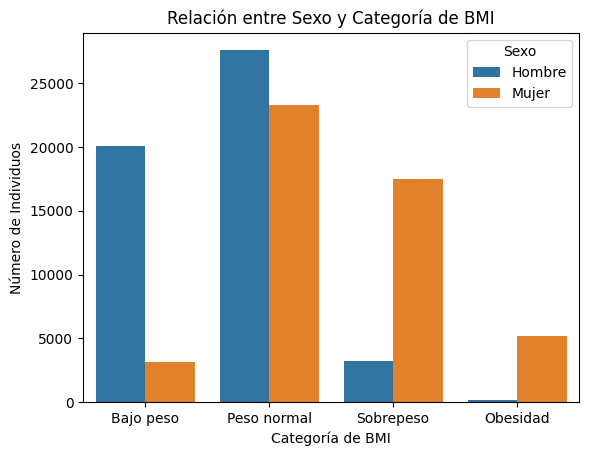

In [21]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Bajo peso', 'Peso normal', 'Sobrepeso', 'Obesidad']

df['BMI_Categoria'] = pd.cut(df['BMI'], bins=bins, labels=labels)

relacion_sexo_bmi = pd.crosstab(df['Sexo'], df['BMI_Categoria'], normalize='index')

sns.countplot(x='BMI_Categoria', hue='Sexo', data=df)
plt.xlabel('Categoría de BMI')
plt.ylabel('Número de Individuos')
plt.title('Relación entre Sexo y Categoría de BMI')
plt.legend(title='Sexo', labels=['Hombre', 'Mujer'])
plt.show()


In [22]:
X = df[['Peso', 'Estatura']] 
y = df['BMI'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

modelo_regresion = LinearRegression()

modelo_regresion.fit(X_train, y_train)

y_pred = modelo_regresion.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

print("Coeficientes del modelo:")
print("Intercepto:", modelo_regresion.intercept_)
print("Coeficientes de Peso y Estatura:", modelo_regresion.coef_)

nuevo_peso = 75.0
nueva_estatura = 175.0
nuevo_bmi = modelo_regresion.predict([[nuevo_peso, nueva_estatura]])
print(f"Predicción de BMI para un individuo con {nuevo_peso} kg y {nueva_estatura} cm de estatura:", nuevo_bmi[0])

NameError: name 'train_test_split' is not defined